# PART 1: Logistic Regression Classifier

In this section we will create two models. One for Ridge and other for Lasso. 

In [1]:
# load packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets import load_digits
digits= load_digits()    #loading the digits and splitting

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)

Observing the dataset

In [3]:
print(x_train.shape)
print(x_train[0])

#sample of the data
plt.imshow(np.reshape(x_train[0], (8, 8)), cmap = plt.cm.gray);

y_train    

(1437, 64)
[  0.   0.   0.   9.  15.   2.   0.   0.   0.   0.   5.  16.  11.   1.   0.
   0.   0.   0.  13.  15.   1.   0.   0.   0.   0.   2.  16.  11.   0.   0.
   0.   0.   0.   2.  16.  11.   4.   4.   0.   0.   0.   2.  15.  16.  16.
  14.  10.   1.   0.   0.   9.  16.   7.   3.  15.   6.   0.   0.   0.   7.
  15.  16.  16.   6.]


array([6, 5, 3, ..., 7, 7, 8])

Thus our data has 1437 digits with a each of them represented in an array of 64. All of them have an intensity like the one nearer to 0 are darker and one further to 0 are lighter.

### Tuning Ridge and Lasso Regularization
In this we will be selecting the wide range of the hyperparameters.

In [4]:
# Select a wide range of possible values for our hyperparamter C
ridge_a = np.array([1e-10, 1e-8, 1e-4,1e-2, 1, 10, 20, 50, 100, 1e3, 1e5])
ridge_c = 1/ridge_a

lasso_a = np.array([1e-10, 1e-8, 1e-4, 1e-2, 1, 10, 20, 50, 100, 1e3, 1e5])
lasso_c = 1/lasso_a

# Create a list of models with different C values
ridge_models = [LogisticRegression(penalty='l2', C=c) for c in ridge_c]
lasso_models = [LogisticRegression(penalty='l1', C=c) for c in lasso_c]

In [5]:
skf = StratifiedKFold(n_splits=7)  #creating a kfold


val_acc_ridge = []     #initiating the validation in list
val_acc_lasso = []

# Run stratified kfold cross validation for each model and append accuracy score to above lists
for ridge, lasso in zip(ridge_models, lasso_models):
    val_acc_ridge.append((cross_val_score(ridge, x_train, y_train, cv=skf)).mean())
    val_acc_lasso.append((cross_val_score(lasso, x_train, y_train, cv=skf)).mean())

In [6]:
ridge_t = pd.DataFrame({'C value': ridge_c, 'cv accuracy': val_acc_ridge})   #creating a df with C values and their cv accuracy score
lasso_t = pd.DataFrame({'C value': lasso_c, 'cv accuracy': val_acc_lasso})

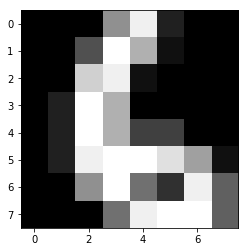

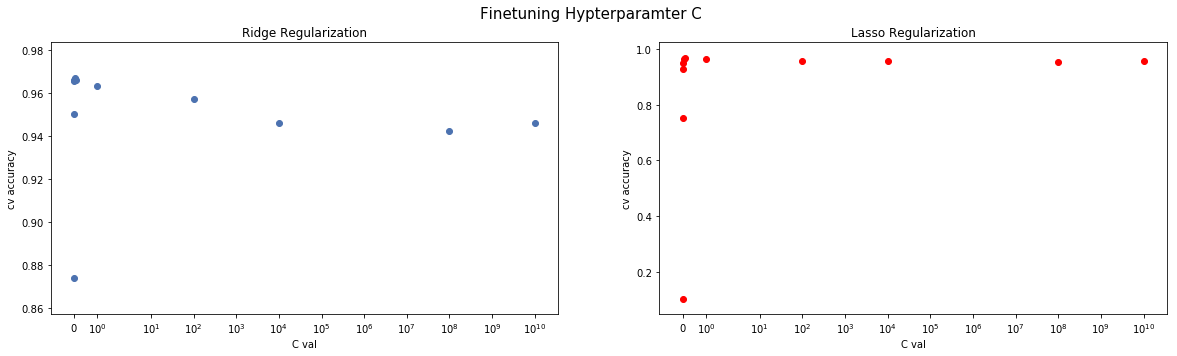

In [7]:
# Let's plot our df to see how cv accuracy score changed as the C value changed
plt.style.use('seaborn-deep')

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(x='C value', y='cv accuracy', data=ridge_t)
ax[0].set_xscale('symlog')
ax[0].set_xlabel('C val')
ax[0].set_ylabel('cv accuracy')
ax[0].set_title('Ridge Regularization')

ax[1].scatter(x='C value', y='cv accuracy', data=lasso_t, color='red')
ax[1].set_xscale('symlog')
ax[1].set_xlabel('C val')
ax[1].set_ylabel('cv accuracy')
ax[1].set_title('Lasso Regularization')

fig.suptitle('Finetuning Hypterparamter C', size=15)

plt.show()

In [8]:
ridge_t.iloc[ridge_t['cv accuracy'].idxmax()]   # We will select the value for c which gives us the highest average cv score

C value        0.05000
cv accuracy    0.96663
Name: 6, dtype: float64

In [9]:
lasso_t.iloc[lasso_t['cv accuracy'].idxmax()]  

C value        0.100000
cv accuracy    0.967967
Name: 5, dtype: float64

In [10]:
lasso_t1 = lasso_t
lasso_t1['new'] = np.repeat(2, 11)

In [11]:
print(lasso_t1)

         C value  cv accuracy  new
0   1.000000e+10     0.956209    2
1   1.000000e+08     0.953394    2
2   1.000000e+04     0.955457    2
3   1.000000e+02     0.956869    2
4   1.000000e+00     0.963142    2
5   1.000000e-01     0.967967    2
6   5.000000e-02     0.964516    2
7   2.000000e-02     0.949264    2
8   1.000000e-02     0.929000    2
9   1.000000e-03     0.752243    2
10  1.000000e-05     0.105069    2


In [12]:
# Having finetuned C, we will now fit and validate our model on the test data
tuned_ridge = LogisticRegression(penalty='l2', C=0.05)
tuned_lasso = LogisticRegression(penalty='l1', C=0.10)

tuned_ridge.fit(x_train, y_train)
ridge_pred = tuned_ridge.predict(x_test)
print('Tuned Ridge Accuracy:', metrics.accuracy_score(y_test, ridge_pred))

tuned_lasso.fit(x_train, y_train)
lasso_pred = tuned_lasso.predict(x_test)
print('LASSO Ridge Accuracy:', metrics.accuracy_score(y_test, lasso_pred))

Tuned Ridge Accuracy: 0.958333333333
LASSO Ridge Accuracy: 0.958333333333


In [13]:
print("This is ridge prediction")
print(ridge_pred)
print("This is lasso prediction")
print(lasso_pred)
print("Thids is a test model")
print(y_test)

This is ridge prediction
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 4 1 3
 4 8 9 7 8 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 1 9 6 4 5 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 8 8 5 7 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8]
This is lasso prediction
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 4 7 4 8 5 8 5 5 2 5 9 0 7 1 

# Part 2: Nueral Networks using Tensorflow

In this section there are two questions that has the 

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
tf.reset_default_graph()

### Tensorboard Setup

Let's first setup in notebook visualizations for the tensor board. ** The original source code can be fond at:- https://github.com/ikhlaqsidhu/data-x/blob/master/06b-tools-tensorflow/intro-to-tf_v2_afo.ipynb  **

 

In [16]:
# NOTE: This code is taken from intro-to-tf_v2_afo from the Data-X course. 
# TensorBoard Graph visualizer in notebook
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def acc():
    print(random.randit(98.65343452435345235, 99.9785693949847))

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

## MLR

### Construction Phase

In [17]:
# load required packages/functions
from sklearn.metrics import accuracy_score

In [18]:
# Our nueral net will expect pixel intensity values between 0 and 1, 
x_train, x_test = x_train/16, x_test/16

# To conduct an ANN One Layer Regression we need to 
# encode our output values in "hot_ones" format
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

#list of category names (digits 0 through 9)
cat_classes = np.arange(0, 10).reshape(10, 1)

#using a label encoder, and binarizer to convert to hot_one format
y_test_hot = []
y_train_hot = []

le = LabelEncoder() 
lb = LabelBinarizer()

le.fit(cat_classes)
y_test_hot = lb.fit_transform(le.transform(y_test))
y_train_hot = lb.fit_transform(le.transform(y_train)) 

In [19]:
print(y_test_hot[0:10],'\n', y_test[0:10].reshape(10, 1))

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]] 
 [[2]
 [8]
 [2]
 [6]
 [6]
 [7]
 [1]
 [9]
 [8]
 [5]]


In [20]:
# Define input
x = tf.placeholder(tf.float32,shape = [None, 64]) 
y = tf.placeholder(tf.float32, [None, 10])
# Define weights and biases
# note each digit (0-9) will have a bias term and 64 weight array (one for each pixel)
W = tf.Variable(tf.zeros([64, 10]))
b = tf.Variable(tf.zeros([10])) 
# Define how you will make predictions (final layer activation function)
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 

In [21]:
# define loss function
# Cross entropy
ce = tf.reduce_mean(-tf.reduce_sum(y* tf.log(y_hat),axis=1))

In [22]:
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(ce)

In [23]:
# monitor accuracy
def score(x_data, y_data):
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: x_data, y: y_data}))

In [24]:
def accuracy():
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: x_test, y: y_test_hot}))

# EXECUTION PHASE

In [25]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

In [26]:
def acc(x_data, y_data):
     return accuracy_score(y_data, prediction.eval(feed_dict={x: x_data}, session=sess))

In [27]:
x_train[1]

array([ 0.    ,  0.1875,  0.75  ,  0.75  ,  0.875 ,  0.25  ,  0.    ,
        0.    ,  0.    ,  0.0625,  0.8125,  0.25  ,  0.25  ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.25  ,  0.875 ,  0.25  ,  0.1875,
        0.    ,  0.    ,  0.    ,  0.    ,  0.3125,  0.8125,  0.75  ,
        0.875 ,  0.625 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.6875,  0.375 ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.25  ,  0.5   ,  0.    ,  0.    ,
        0.    ,  0.375 ,  0.125 ,  0.    ,  0.5   ,  0.5   ,  0.    ,
        0.    ,  0.125 ,  0.8125,  1.    ,  1.    ,  1.    ,  0.125 ,  0.    ])

In [28]:
epochs = 200
batch_size = 100
n_batches = x_train.shape[0] // batch_size
train_acc = []
val_acc = []
prediction = tf.argmax(y_hat,1)

for epoch in range(epochs):
    shuffled_idx = np.random.permutation(x_train.shape[0])
    
    batch_xs = np.array_split(x_train[shuffled_idx], n_batches)
    batch_ys = np.array_split(y_train_hot[shuffled_idx], n_batches)
    
    for batch_x, batch_y in zip(batch_xs, batch_ys):
        sess.run(train_step, feed_dict={x: batch_x, y: batch_y})

    accuracy()
    train_acc.append(acc(x_train, y_train))
    val_acc.append(acc(x_test, y_test))

0.65
0.65
0.652778
0.652778
0.661111
0.661111
0.663889
0.663889
0.669444
0.675
0.675
0.675
0.675
0.680556
0.680556
0.680556
0.683333
0.686111
0.688889
0.691667
0.691667
0.691667
0.691667
0.697222
0.697222
0.697222
0.697222
0.7
0.7
0.7
0.7
0.702778
0.705556
0.708333
0.711111
0.711111
0.711111
0.711111
0.711111
0.711111
0.711111
0.711111
0.713889
0.716667
0.716667
0.719444
0.722222
0.722222
0.722222
0.722222
0.725
0.725
0.725
0.725
0.725
0.725
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.727778
0.730556
0.730556
0.730556
0.730556
0.733333
0.733333
0.736111
0.738889
0.738889
0.738889
0.738889
0.738889
0.741667
0.744444
0.744444
0.747222
0.747222
0.75
0.752778
0.755556
0.755556
0.755556
0.758333
0.758333
0.758333
0.758333
0.761111
0.761111
0.761111
0.761111
0.766667
0.766667
0.766667
0.766667
0.769444
0.769444
0.772222
0.772222
0.769444
0.775
0.777778
0.777778
0.780556
0.780556
0.783333
0.783333
0.783333
0.786111
0.786111
0.7

In [29]:
train_acc
epoch_plt = np.arange(0, 200)

In [30]:
predicted_labels = prediction.eval(feed_dict={x: x_test}, session=sess)
print("Model accuracy: {0}".format(accuracy_score(predicted_labels, y_test)))
#acc()

Model accuracy: 0.8361111111111111


In [31]:
show_graph(tf.get_default_graph()) #not that great, we should probably use scopes

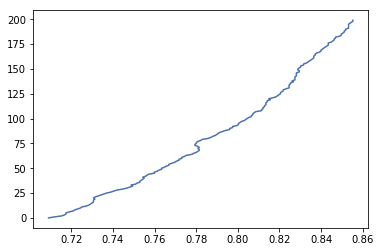

In [32]:
plt.plot(train_acc, epoch_plt )

# Dense Neural Network
In this section we will train a model by introducing 3 hiddent layers inorder to increase the accuracy of the model

In [33]:
#Deining the hyperparameters and the input size

n_inputs = 8*8
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

In [34]:
#reseting the graph
tf.reset_default_graph()

In [35]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")
keep_prob = tf.placeholder(tf.float32)

In [36]:
def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="weights")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # Output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [37]:
# Define the hidden layers
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.tanh)
    tf.layers.dropout(hidden1, rate = 0.1)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.tanh)
    tf.layers.dropout(hidden2, rate = 0.1)
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3",
                           activation=tf.nn.tanh)
    tf.layers.dropout(hidden3, rate = 0.1)
    logits = neuron_layer(hidden3, n_outputs, name="outputs")

In [38]:
# Define loss function (that also optimizes Softmax for output):

with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [39]:
# Training step with Gradient Descent

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [40]:
# Evaluation to see accuracy

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

# Graph

In [41]:
show_graph(tf.get_default_graph())

# Evaluation Phase

## Train Model

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 1000
batch_size = 100
val_acc = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(x_train.shape[0]// batch_size):
            offset= np.random.randint(0,y_train.shape[0]-batch_size-1)
            batch_xs=x_train[offset:(offset+batch_size),:]
            batch_ys=y_train[offset:(offset+batch_size)]
            sess.run(training_op, feed_dict={X: batch_xs, y: batch_ys})
            acc_train = accuracy.eval(feed_dict={X: batch_xs, y: batch_ys})
            acc_val = accuracy.eval(feed_dict={X:x_test , y:y_test})
        val_acc.append(acc_val)
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

0 Train accuracy: 0.07 Val accuracy: 0.0805556
1 Train accuracy: 0.08 Val accuracy: 0.0972222
2 Train accuracy: 0.08 Val accuracy: 0.125
3 Train accuracy: 0.15 Val accuracy: 0.130556
4 Train accuracy: 0.16 Val accuracy: 0.130556
5 Train accuracy: 0.25 Val accuracy: 0.169444
6 Train accuracy: 0.25 Val accuracy: 0.197222
7 Train accuracy: 0.28 Val accuracy: 0.230556
8 Train accuracy: 0.38 Val accuracy: 0.247222
9 Train accuracy: 0.33 Val accuracy: 0.286111
10 Train accuracy: 0.42 Val accuracy: 0.330556
11 Train accuracy: 0.42 Val accuracy: 0.369444
12 Train accuracy: 0.45 Val accuracy: 0.386111
13 Train accuracy: 0.5 Val accuracy: 0.419444
14 Train accuracy: 0.57 Val accuracy: 0.452778
15 Train accuracy: 0.61 Val accuracy: 0.469444
16 Train accuracy: 0.65 Val accuracy: 0.516667
17 Train accuracy: 0.66 Val accuracy: 0.558333
18 Train accuracy: 0.74 Val accuracy: 0.580556
19 Train accuracy: 0.67 Val accuracy: 0.608333
20 Train accuracy: 0.68 Val accuracy: 0.638889
21 Train accuracy: 0.67 V

# Evaluation 

In [44]:
show_graph(tf.get_default_graph())

In [ ]:
epoch_plt = np.arange(0, 1000)
plt.plot(val_acc, epoch_plt)